<a href="https://colab.research.google.com/github/sheinhtetsai99/Dog-Vision/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end multi-class Dog Breed Classification 
This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub. 

## 1. Problem 
Indentifying the breed of a dog given an image of a dog. 

When I'm sitting at a cafe and I take a photo of a dog, I want to know what breed it is. 

## 2. Data 
The data we're using is from Kaggle's dog breed identification competition. 

## 3. Evaluation 

The evaluation is a file with prediction probabilities for each dog of each test image. 

## 4. Features 

Some information about the data: 
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning. 

* There are 120 breeds of dogs (This means that there are 120 different classes). 

* There are around 10000+ images in the training set (these images have labels) 

* There are around 10,000+ images in the test set (no labels since we want to predict them) 

In [ ]:
#!unzip '/content/drive/My Drive/Dog Vision/dog-breed-identification.zip' -d "drive/My Drive/Dog Vision/"

# Get our workspace ready

* Import TensorFlow 2.x
* Import Tensorflow Hub 
* Make aure we're using a GPU

In [ ]:
# Import necessary tools
import tensorflow as tf 
import tensorflow_hub as hub
print('TF version:', tf.__version__)
print('TF Hub version:', hub.__version__)

# Check for GPU availability 
print('GPU', 'available (YESSSS!!!!)' if tf.config.list_physical_devices('GPU') else 'not avilable')


TF version: 2.2.0
TF Hub version: 0.8.0
GPU available (YESSSS!!!!)


## Getting our data read (Turning into Tensors)

As with all machine learning models, our data has to be in numerical format. So that's what we will be doing first

Let's start by accessing our data and checking out the labels. 

In [ ]:
# Checkout the labels of our data 
import pandas as pd 
labels_csv = pd.read_csv('drive/My Drive/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     6f30c0ce7476fda0181542e1f9bfe569  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

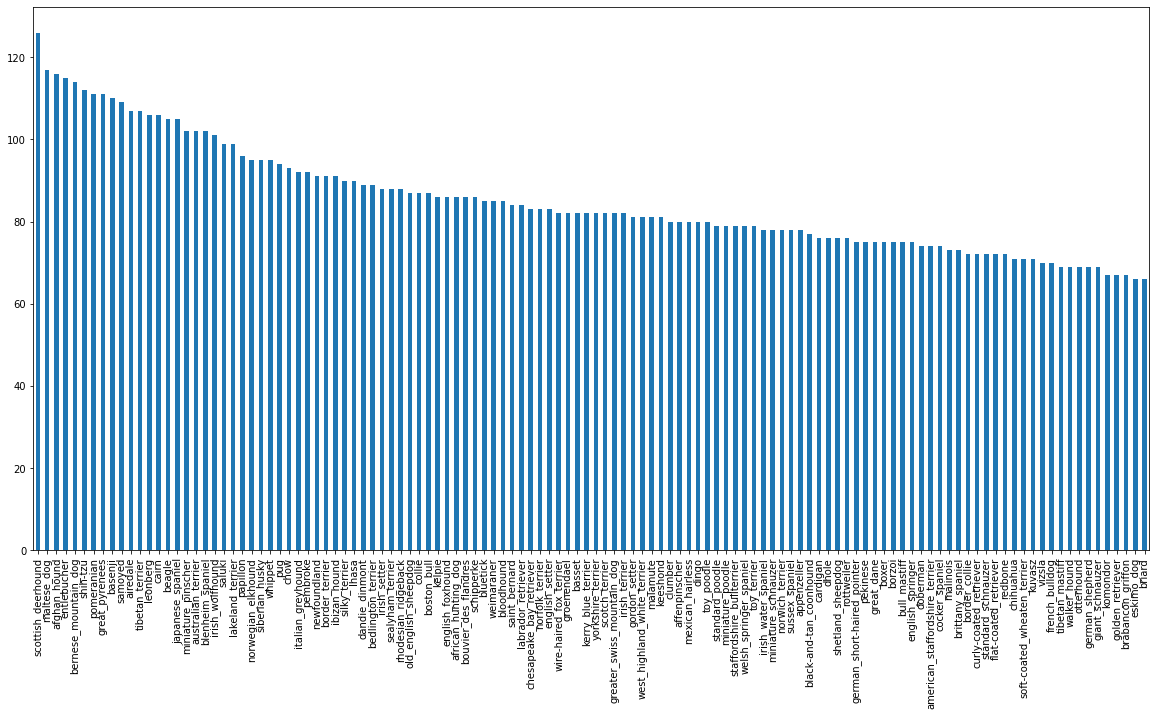

In [ ]:
# How many images are there of each breed? 
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

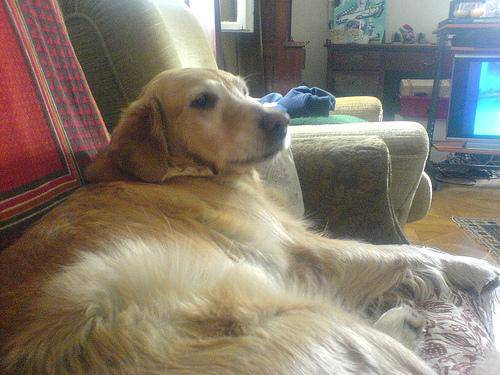

In [ ]:
# Let's view am image 
from IPython.display import Image 
Image('drive/My Drive/Dog Vision/train/00a366d4b4a9bbb6c8a63126697b7656.jpg')

### Getting images and their labels 

Let's get a list of all our image file path 
names


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Create pathnames from image ID's 
filenames= ['drive/My Drive/Dog Vision/train/'+ fname + '.jpg' for fname in labels_csv['id']]

# Chech the first 10 
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir('drive/My Drive/Dog Vision/train')[:10]

['f340906abda537fa75a9b73ba2742a88.jpg',
 'ee8315e3cef238ea380d197ceb26a476.jpg',
 'ec760d9e97fdc7816c3cb44ea9aa33ed.jpg',
 'efe33a3e4c939748548a052f5f6d83bd.jpg',
 'f07d7513b336f4cf1ac5be3b46eecd66.jpg',
 'f28c40401e84e41f5aa4c60fea02a575.jpg',
 'f52a0aaff41a517be216bf41c967a751.jpg',
 'efec2f66576df7aa036d77ad1fafc8bf.jpg',
 'f0dafbc65d9ddbb847863d8d510b3948.jpg',
 'eeaccf7f12c1e959de200bf2849ec101.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files 
import os 
if len(os.listdir('drive/My Drive/Dog Vision/train')) == len(filenames):
  print('Filenames match actual amount of files!!! Proceed.')
else: 
  print('Filenames do not match actual amount of files, check the target directory.')
  

Filenames match actual amount of files!!! Proceed.


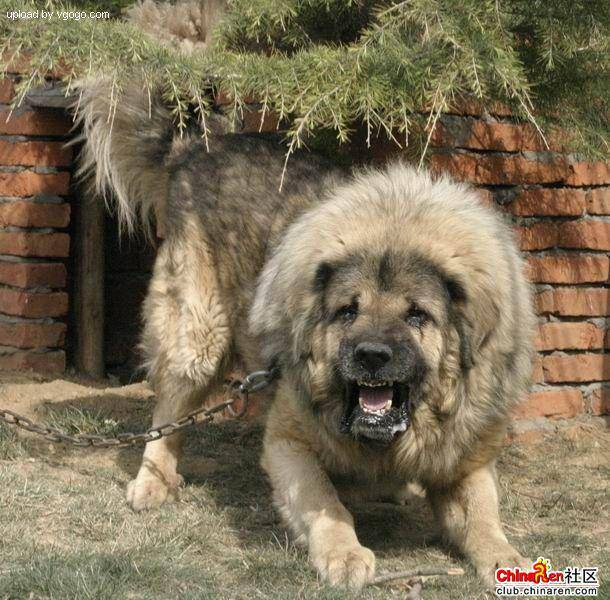

In [ ]:
# One more check 
Image(filenames[9000])

Since we've now got our training image filepaths in a list, let's prepare our labels

In [ ]:
import numpy as np 
labels = labels_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches number of filenames 
if len(labels) == len(filenames):
  print('Yay proceed')

else: 
  print('No :(')

Yay proceed


In [ ]:
# Find the unique label values 
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans 
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers 
print(labels[0]) # Original label 
print(np.where(unique_breeds == labels[0])) # index where label occurs 
print(boolean_labels[0].argmax()) # index where label occurs in boolean array 
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs 

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set 
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own 

In [ ]:
# Setup X & y variables 
X = filenames 
y = boolean_labels

In [ ]:
len(filenames)

10222

We're going to start off experimenting ~1000 images and increase as needed 

In [ ]:
# Set number of images to use for experimenting 
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets 
from sklearn.model_selection import train_test_split 

# Split them into training and validation of total size NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images (Turning images into Tensors) 

To preprocess our images into Tensors we're going to write a function which does a few things: 
1. Take an image filepath as input 
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224,224) 
5. Return the modified `image`

Before we do, let's see what importing an image looks like. 

In [ ]:
# Convert image to NumPy array 
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

Now we've seen what an image looks like as a tensor, let's make a function to preprocess them. 

1. Take an image filepath as input 
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalise our image (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224,224) 
6. Return the modified `image`


In [ ]:
# Define image size 
IMG_SIZE = 224

# Create a function for preprocessing images 
def process_image(image_path): 
  """
  Takes an image filepath and turns the image into a Tensor
  """
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values 
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desire value  (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches 

Why turn our data into batches? 

Let's say you are trying to process 10,000+ images in one go... they all might not fit into memory .

So that's why we do about 32 (this is batch size) images at a time (you can manually adjust the batch size if need be). 

In order to use TensorFlow effectively, we need our data in the form of Tensor Tuples which look like this `(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """ 
  Takes an image file path name and the associate label
  and processes the image and returns a tuple of (image, label)
  """

  image = process_image(image_path)
  return image, label 


In [ ]:
# Demo of the above 
(process_image(X[42]),y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (x & y) into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32 

# Create a function to turn data into batches 
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs. 
  Shuffles the data if it's training data but doesn't shuffle if it's validation data. 
  Also accepts test data as input (no labels)
  """ 
  # If the data is a test dataset, we probably don't have labels 
  if test_data: 
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it 
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating training batches...')
    # Turn filepaths and labels into Tensors 
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images 
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprecessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches 
    data_batch = data.batch(BATCH_SIZE)

    return data_batch                                        
                                      

In [ ]:
# Create training and validation data batches 
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches 
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualising Data Batches 

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualise them! 

In [ ]:
import matplotlib.pyplot as plt 
# Create a function for viewing images in a data batch 
def show_25_images(images, labels): 
  """
  Displays a plot of 25 images and their labels from a data batch.
  """ 

  # Setup the figure 
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title 
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the gridlines off 
    plt.axis('off')
  

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

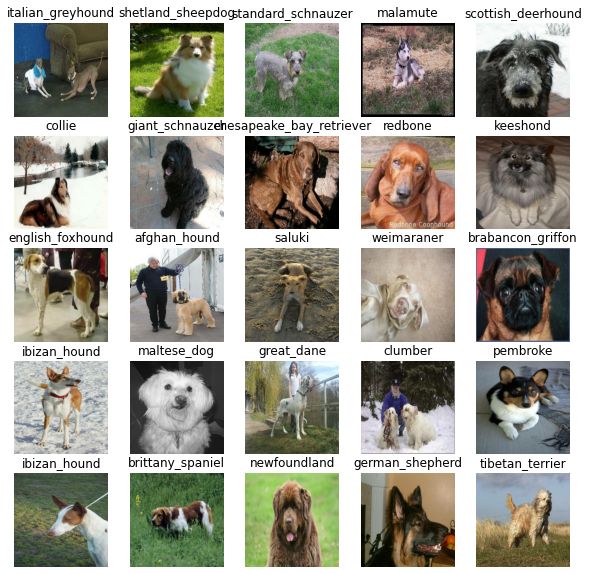

In [ ]:
# Now let's visualise the data in a training batch 
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

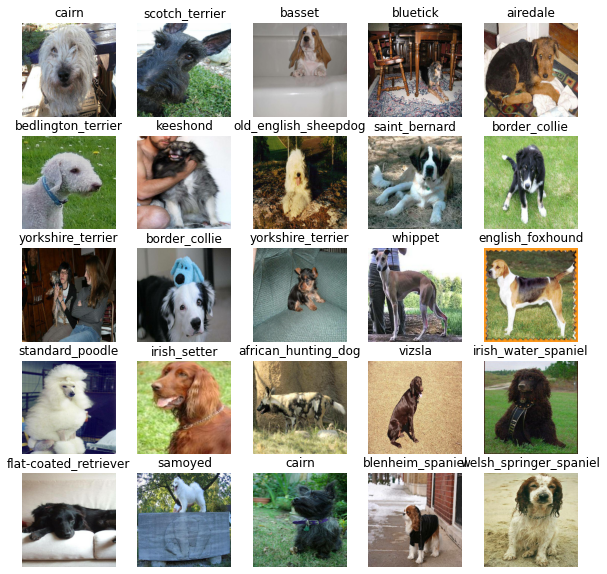

In [ ]:
# Now let's visualise our validation set 
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model 

Before we build a model, there are a few things we need to define: 
* The input shape (our images shape, in the form of Tensors) to our model. 
* The output shape (image labels, in the form of Tensors) of our model. 
* The URL of the model we want to use from TensorFlow Hub: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
# Setup input size to the model 
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels 

# Setup output shape of our model 
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub 
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready to go. 
Let's put them together into a Keras deep learning model! 

Knowing this, let's create a function which: 
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Complies the model (says how it should be evaluated and improved). 
* Builds the model (tells the model the input shape it'll be getting)
* Returns the model.

All of the steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
# Cerate a function which builds a Keras model 
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with:', MODEL_URL)

  # Setup the model layers 
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                      activation='softmax') # Layer 2 (output layer)
  ])

  # Compile the model 
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks 
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving. 

We'll create two callbacks, one for TensorBoard which helps track our models progress and early stopping callback which prevents our model from training for too long. 

### TensorBoard Callback 

To setup a TensorBoard call back, we need to do 3 things 
1. Load the TensorBoard notebook extension 
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [ ]:
# Load TensorBoard notebook extension 
%load_ext tensorboard 

In [ ]:
import datetime 

# Create a function to build a TensorBoard callback 
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs 
  logdir = os.path.join('drive/My Drive/Dog Vision/logs',
                        # Make it so the logs get tracked whenever we run an experiment 
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
                        )
  
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback 

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving

In [ ]:
# Create early stopping callbacks 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)


## Training a model (on subset of data)

Our first model is only going to train on 1000 images to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param{type:'slider', min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still running on a GPU 
print('GPU', 'available (YES!!)' if tf.config.list_physical_devices('GPU') else 'not avilable')

GPU available (YES!!)


Let's create a function which trains a model. 

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` functions on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use 
* Return the model

In [ ]:
# Build a function to train and return a trained model 
def train_model():
  """
  Trains a given model and returns the trained version.
  """ 
  # Create a model 
  model = create_model()

  # Create a new TensorBoard model everytime we train a model 
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  # Return the fitted model 
  return model 

In [ ]:
# Fit the model to the data 
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 372s 15s/step - loss: 4.5349 - accuracy: 0.1100 - val_loss: 3.4624 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 8s 318ms/step - loss: 1.6083 - accuracy: 0.6900 - val_loss: 2.2268 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 7s 291ms/step - loss: 0.5606 - accuracy: 0.9337 - val_loss: 1.7158 - val_accuracy: 0.5550
Epoch 4/100
25/25 [==============================] - 7s 294ms/step - loss: 0.2543 - accuracy: 0.9825 - val_loss: 1.5273 - val_accuracy: 0.5650
Epoch 5/100
25/25 [==============================] - 8s 303ms/step - loss: 0.1464 - accuracy: 1.0000 - val_loss: 1.4562 - val_accuracy: 0.5850
Epoch 6/100
25/25 [==============================] - 7s 286ms/step - loss: 0.0991 - accuracy: 1.0000 - val_loss: 1.4191 - val_accuracy: 0.5900
Epoch 7/100
25/25 [==============================

### Checking the TensorBoard Logs 

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents. 


In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model 


In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 184ms/step


array([[5.3680857e-04, 1.6721784e-05, 6.9138929e-03, ..., 3.7630493e-04,
        5.4403547e-05, 3.6917389e-03],
       [2.3822570e-03, 1.6423907e-03, 8.1546344e-03, ..., 1.0727774e-03,
        5.3898445e-03, 1.2724911e-04],
       [6.8014760e-06, 3.9715076e-05, 4.5212296e-06, ..., 4.4309974e-05,
        8.3650402e-06, 7.5645075e-05],
       ...,
       [4.3870136e-06, 7.2936447e-05, 1.0415307e-03, ..., 1.2853990e-05,
        6.6694884e-05, 2.6275270e-04],
       [1.8082139e-03, 6.5290893e-05, 1.1484542e-04, ..., 8.0143756e-05,
        1.9926312e-05, 3.9901249e-03],
       [5.8512198e-04, 7.7678278e-06, 7.5545977e-04, ..., 1.3227353e-02,
        1.8718905e-03, 4.0421649e-04]], dtype=float32)

In [ ]:
# First prediction 
index=-1
print(predictions[index])
print(f'Max value (probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[5.8512198e-04 7.7678278e-06 7.5545977e-04 1.0302155e-04 9.2958711e-04
 3.2226771e-01 5.0026475e-04 1.1854455e-02 6.2082647e-05 1.1766042e-03
 1.0868549e-04 3.7325367e-02 1.1029897e-03 9.7648305e-04 1.4147244e-04
 5.0089846e-04 8.9825420e-03 7.1302336e-04 1.7448694e-03 4.3252870e-02
 2.6471890e-04 7.3240517e-05 4.8547238e-03 3.0667059e-05 1.7297716e-03
 3.5542773e-05 5.4443930e-04 3.2604876e-01 1.2923343e-03 5.0239806e-04
 1.9220573e-05 2.1957366e-03 1.7904819e-04 4.2370383e-02 3.7112914e-04
 7.0662901e-04 4.0024745e-05 4.5745587e-04 1.7997811e-03 2.1487758e-04
 7.6475012e-04 2.1501204e-03 5.3171278e-03 1.0685309e-02 2.2808107e-02
 9.1463944e-06 1.4758128e-03 2.2676449e-04 1.5591123e-04 1.5115151e-04
 1.8089692e-04 4.5947891e-05 1.0826859e-03 9.9048363e-03 8.9063898e-05
 1.0952717e-03 1.3478471e-04 5.3542812e-04 1.5305377e-04 7.2781324e-05
 3.8065610e-04 4.2628902e-03 8.6141285e-05 5.0422875e-04 4.1802530e-05
 3.4938430e-04 1.5296674e-03 3.3287462e-04 1.2037423e-04 6.4575877e-05
 4.943

In [ ]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to be able to do it at scale. 

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence intervals 

In [ ]:
# Turn prediction probabilities into their respective labels (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Now since our validation data is still in a batch datasetm we'll have to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """ 
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels. 
  """ 

  images = []
  labels = []
  # Loop through unbatched data 
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels 

# Unbatchify the validation data 
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]



(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
images_ = []
labels_ = []

# Loop through unbatched data 
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

In [ ]:
images_[0]

array([[[0.29599646, 0.43284872, 0.3056691 ],
        [0.26635826, 0.32996926, 0.22846507],
        [0.31428418, 0.2770141 , 0.22934894],
        ...,
        [0.77614343, 0.82320225, 0.8101595 ],
        [0.81291157, 0.8285351 , 0.8406944 ],
        [0.8209297 , 0.8263737 , 0.8423668 ]],

       [[0.2344871 , 0.31603682, 0.19543913],
        [0.3414841 , 0.36560842, 0.27241898],
        [0.45016077, 0.40117094, 0.33964607],
        ...,
        [0.7663987 , 0.8134138 , 0.81350833],
        [0.7304248 , 0.75012016, 0.76590735],
        [0.74518913, 0.76002574, 0.7830809 ]],

       [[0.30157745, 0.3082587 , 0.21018331],
        [0.2905954 , 0.27066195, 0.18401104],
        [0.4138316 , 0.36170745, 0.2964005 ],
        ...,
        [0.79871625, 0.8418535 , 0.8606443 ],
        [0.7957738 , 0.82859945, 0.8605655 ],
        [0.75181633, 0.77904975, 0.8155256 ]],

       ...,

       [[0.9746779 , 0.9878955 , 0.9342279 ],
        [0.99153054, 0.99772066, 0.9427856 ],
        [0.98925114, 0

Now we've got ways to get: 
* Prediction labels 
* Validation labels (truth labels)
* Validation images 

Let's make some fuctions to make these all a bit more visual

We'll create a function which: 
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. 
* Convert the prediction probabilities to a predicted label. 
* Plot the predicted label, it's predicted probability, the truth label and target image on a single plot. 

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """ 
  View the prediction, ground truth and image for sample n
  """ 
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label 
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove tikcks 
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color='green'

  else:
    color = 'red'

  # Chenage plot title to be predicted, probability of prediction and truth label 
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
                                   color=color)

  pass 


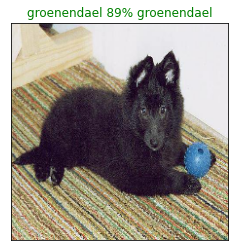

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visulise our model's top predictions, let's make another to view our models top 10 predicted label

This function will: 
* Take an input of prediction probabilities array and a ground truth array and an integer 
* Find the prediction using `get_pred_labels()`
* Find the top 10:
  * Prediction probabilities indexes 
  * Prediction probabilities values 
  * Prediction labels 
* Plot the top 10 prediction probability values and labels, colouring the true label green 


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """ 
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label 
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes 
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values 
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels 
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot 
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  
  # Change the color of the true label 
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')

  else:
    pass


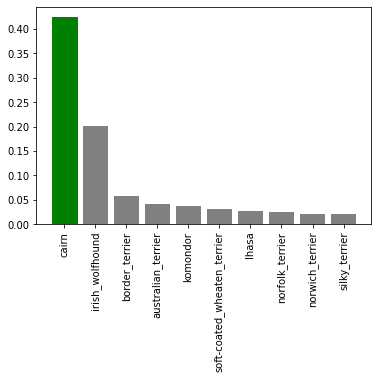

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=0)

Now we've got some functions to help us visualise our predictions and evaluate our model, let's check out a few. 

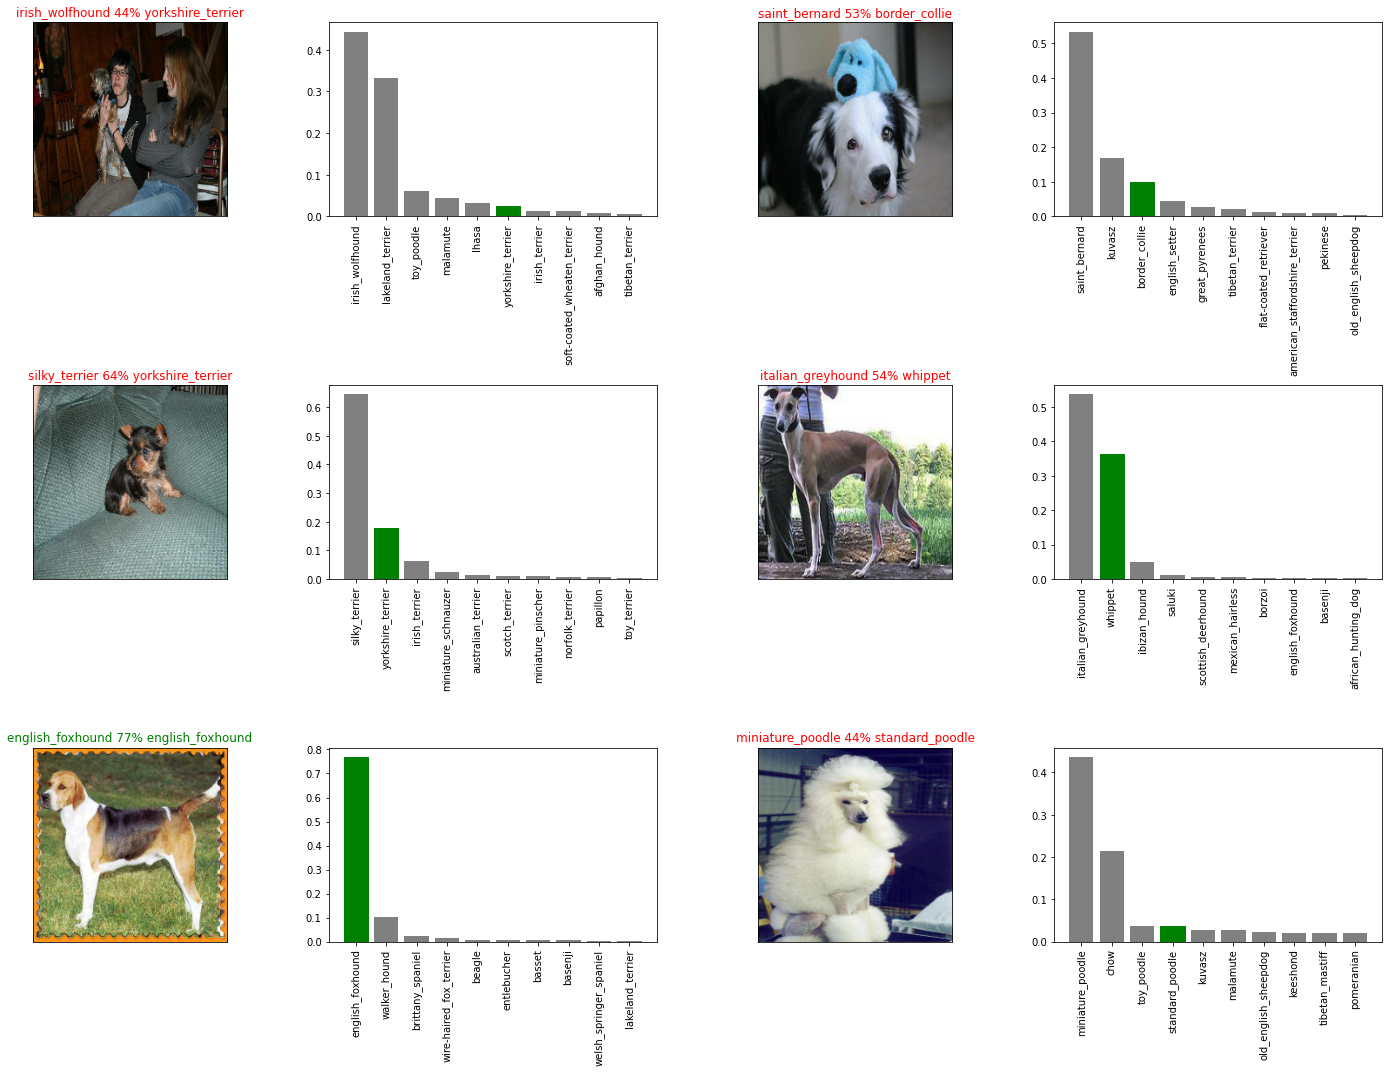

In [ ]:
# Let's check out a few predictions and their different values 
i_multiplier = 10 
num_rows = 3 
num_cols = 2 
num_images = num_rows*num_cols 
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions, 
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


## Saving and reloading a trained model 

In [ ]:
# Create a function to save the model 
def save_model(model, suffix=None):
  """
  Saves a given model in a model directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time 
  modeldir= os.path.join('drive/My Drive/Dog Vision/models',
                         datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  
  model_path = modeldir + '-' + suffix + '.h5' # save format of model 
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model 
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f'Loading saved model from: {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer': hub.KerasLayer})
  
  return model

Now we've got function to save and load a trained model, let's make sure they work!


In [ ]:
# Save our model trained on 1000 images 
save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to: drive/My Drive/Dog Vision/models/20200729-02351595990125-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200729-02351595990125-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model 
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200727-15321595863969-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200727-15321595863969-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model 
model.evaluate(val_data)

7/7 [==============================] - 1s 177ms/step - loss: 1.2920 - accuracy: 0.6550


[1.2920045852661133, 0.6549999713897705]

In [ ]:
# Evaluated the loaded model 
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 169ms/step - loss: 1.2547 - accuracy: 0.6750


[1.2547249794006348, 0.675000011920929]

In [ ]:
## Training a big dog model (on the full data)
len(X), len(y)

(10222, 10222)

In [ ]:
X[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Create a databatch with the full dataset 
full_data = create_data_batches(X, y)

Creating training batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a model for full model 
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks 
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy 
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [ ]:
# Fit the full model to the full data 
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
 20/320 [>.............................] - ETA: 58:58 - loss: 4.8628 - accuracy: 0.0484

KeyboardInterrupt: ignored

In [ ]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')